## Geopandas

In [2]:
import geopandas

In [8]:
df = geopandas.read_file("./geodata/ne_10m_admin_0_countries.shp")

<Axes: >

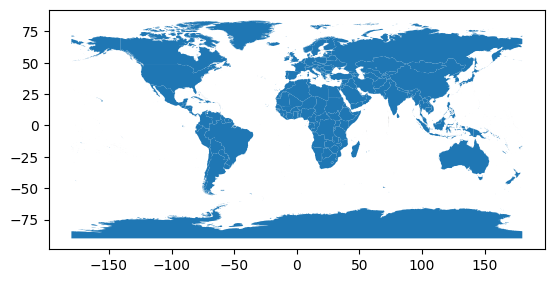

In [9]:
df.plot()

## Cartopy

In [ ]:
from cartopy.io import shapereader
import numpy as np
import geopandas
import matplotlib.pyplot as plt
import matplotlib as mpl
import cartopy.crs as ccrs

# get natural earth data (http://www.naturalearthdata.com/)

# get country borders
resolution = '10m'
category = 'cultural'
name = 'admin_0_countries'

shpfilename = shapereader.natural_earth(resolution, category, name)

# read the shapefile using geopandas
df = geopandas.read_file(shpfilename)

In [ ]:
# read the german borders
fig,ax = plt.subplots(figsize=(16,9))
ax = plt.axes(projection=ccrs.Mercator())

for idx, row in totalCounts.query('normalized > 0.01').iterrows():
    try:
        poly = df.loc[df['ADMIN'] == row['name']]['geometry'].values[0]
        ax.add_geometries(poly, crs=ccrs.Mercator(), facecolor=mp(row['normalized']), edgecolor='1')
        ax.axis('off')
        ax.tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)
    except:
        pass


## Rasterio

In [ ]:
dataset = rasterio.open(input_file_path, 'r')
bands = [1, 2, 3]
data = dataset.read(bands)
transform = rasterio.transform.from_bounds(west, south, east, north, data.shape[1], data.shape[2])
crs = {'init': 'epsg:3006'}

with rasterio.open(output_file_path, 'w', driver='GTiff',
                   width=data.shape[1], height=data.shape[2],
                   count=3, dtype=data.dtype, nodata=0,
                   transform=transform, crs=crs) as dst:
    dst.write(data, indexes=bands)

